# Speech Recognition with DeepSpeech

This notebook uses an open source project [mozilla/DeepSpeech](https://github.com/mozilla/DeepSpeech) to transcribe a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install DeepSpeech

In [1]:
#@title
import os
from os.path import exists, join, basename, splitext

if not exists('deepspeech-0.6.1-models'):
  !apt-get install -qq sox
  !pip install -q deepspeech-gpu==0.6.1 youtube-dl
  !wget https://github.com/mozilla/DeepSpeech/releases/download/v0.6.1/deepspeech-0.6.1-models.tar.gz
  !tar xvfz deepspeech-0.6.1-models.tar.gz
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../2-libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libmagic1:amd64.
Preparing to unpack .../3-libmagic1_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic1:amd64 (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libsox3:amd64.
Preparing to unpack .../4-libsox3_14.4.2-3ubuntu0.18.04.1_amd64.deb ...
Unpacking libsox3:amd64 (14.4.2-3ubuntu0.18.04.1) ...
Selecting previously un

## Transcribe Youtube Video

We are going to make speech recognition on the following youtube video:

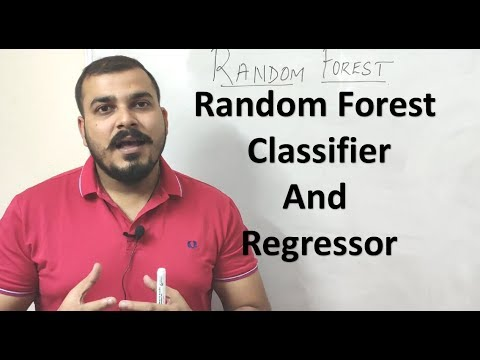

In [4]:
YOUTUBE_ID = 'nxFG5xdpDto'


YouTubeVideo(YOUTUBE_ID)

Download the above video, convert to a WAV file and do speech recognition:

In [5]:
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!deepspeech --model deepspeech-0.6.1-models/output_graph.pbmm --lm deepspeech-0.6.1-models/lm.binary --trie deepspeech-0.6.1-models/trie --audio test.wav

[youtube] nxFG5xdpDto: Downloading webpage
[download] Destination: test.m4a
[download] 100% of 9.54MiB in 00:00
[ffmpeg] Correcting container in "test.m4a"
[ffmpeg] Destination: test.wav
Deleting original file test.m4a (pass -k to keep)
Loading model from file deepspeech-0.6.1-models/output_graph.pbmm
TensorFlow: v1.14.0-21-ge77504a
DeepSpeech: v0.6.1-0-g3df20fe
2020-07-19 04:35:01.302230: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2020-07-19 04:35:01.303691: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2020-07-19 04:35:01.317891: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-19 04:35:01.318488: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found 